# importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# loading the data
data_url = 'https://drive.google.com/file/d/1f-qBseU7kEPSmwDEcUPIFFkY648TL5YO/view?usp=sharing' # this is where we have stored our csv file - we need to make some changes to the file path to make it accessible
gdp_data = 'https://drive.google.com/uc?export=download&id='+data_url.split('/')[-2]


gdp = pd.read_csv(gdp_data, sep=',', encoding='utf-8', on_bad_lines='skip',index_col=False) #read the csv file from the location we provided
gdp.head() #prints the top few rows of our dataset


,Series Name,Series Code,Country Name,Country Code,2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,"Employers, female (% of female employment) (mo...",SL.EMP.MPYR.FE.ZS,Algeria,DZA,1.54901175,1.510891632,1.470846098,1.671603524,1.882907279,1.908531544,1.963369223,1.974076968,1.963722524,1.950856942,1.927643415,1.883164068,1.887766803,1.839311509,..
1,"Employers, female (% of female employment) (mo...",SL.EMP.MPYR.FE.ZS,Angola,AGO,1.469131387,1.912291761,2.45752829,2.788587871,3.12760259,3.466660721,3.416735445,3.441454921,3.458326026,3.485549059,3.483300617,3.512207012,3.49477586,3.498733271,..
2,"Employers, female (% of female employment) (mo...",SL.EMP.MPYR.FE.ZS,Bahrain,BHR,1.999497539,2.176543418,2.161518292,2.175098672,2.168286572,2.193719939,2.213519603,2.331358919,2.394967476,2.461919433,2.502127177,2.548708788,2.569421998,2.872004138,..
3,"Employers, female (% of female employment) (mo...",SL.EMP.MPYR.FE.ZS,Benin,BEN,0.472525906,0.483349144,0.494552608,0.498037373,0.492779388,0.485022752,0.488530849,0.492317771,0.49158011,0.486681109,0.482436941,0.489376163,0.49241519,0.496703264,..
4,"Employers, female (% of female employment) (mo...",SL.EMP.MPYR.FE.ZS,Botswana,BWA,2.048127575,1.815242812,1.598674027,1.40162586,1.215620115,1.256277636,1.268173509,1.276453755,1.266917787,1.26097156,1.252982683,1.27728497,1.276663475,1.240929045,..


In [3]:
gdp['Series Name'].unique()

array(['Employers, female (% of female employment) (modeled ILO estimate)',
       'Employers, male (% of male employment) (modeled ILO estimate)',
       'Employment to population ratio, 15+, female (%) (modeled ILO estimate)',
       'Employment to population ratio, 15+, male (%) (modeled ILO estimate)',
       'GDP per capita (Current US$)',
       'Gross graduation ratio, primary, female (%)',
       'Gross graduation ratio, primary, male (%)',
       'A woman can get a job in the same way as a man (1=yes; 0=no)'],
      dtype=object)

In [4]:
# 1. Filter for the specific 'Series Name'
series_to_keep = 'GDP per capita (Current US$)'
gdp = gdp[gdp['Series Name'] == series_to_keep].copy()

# 2. Define year columns from 2009 to 2022
year_columns = [f'{year} [YR{year}]' for year in range(2009, 2023)]

# 3 & 4. Replace '..' with NaN and convert to numeric
for col in year_columns:
    gdp[col] = pd.to_numeric(gdp[col].replace('..', np.nan), errors='coerce')

# 5. Verify transformation
print("Data types of year columns:")
print(gdp[year_columns].dtypes)
print("\nUpdated DataFrame head:")
gdp.head()

Data types of year columns:
2009 [YR2009]    float64
2010 [YR2010]    float64
2011 [YR2011]    float64
2012 [YR2012]    float64
2013 [YR2013]    float64
2014 [YR2014]    float64
2015 [YR2015]    float64
2016 [YR2016]    float64
2017 [YR2017]    float64
2018 [YR2018]    float64
2019 [YR2019]    float64
2020 [YR2020]    float64
2021 [YR2021]    float64
2022 [YR2022]    float64
dtype: object

Updated DataFrame head:


,Series Name,Series Code,Country Name,Country Code,2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
276,GDP per capita (Current US$),NY.GDP.PCAP.CD,Algeria,DZA,3898.478788,4495.921476,5473.281826,5610.733282,5519.777576,5516.229440,4197.419985,3967.200647,4134.936087,4171.790388,4021.983266,3354.153164,3700.314697,4342.637968,..
277,GDP per capita (Current US$),NY.GDP.PCAP.CD,Angola,AGO,3123.698898,3586.663680,4608.155166,5083.826851,5061.349240,5011.984412,3217.339244,1809.709377,2439.374441,2540.508878,2191.347764,1450.905112,1927.474078,3000.444231,..
278,GDP per capita (Current US$),NY.GDP.PCAP.CD,Bahrain,BHR,19448.183260,21186.814330,23741.557460,25102.726350,25790.730310,25464.760100,22795.448860,22867.181120,24349.909870,25415.846620,25869.112910,23433.187240,26850.003390,30146.925030,..
279,GDP per capita (Current US$),NY.GDP.PCAP.CD,Benin,BEN,1061.718360,1009.489495,1099.414311,1112.569536,1214.295565,1251.504765,1041.652523,1049.820303,1095.274459,1194.438214,1170.885995,1240.733155,1360.911474,1302.851036,..
280,GDP per capita (Current US$),NY.GDP.PCAP.CD,Botswana,BWA,4938.249906,6041.732051,7080.778643,6392.987347,6436.603319,6844.033250,5869.737579,6411.551666,6705.341062,6947.817841,6691.161053,5875.070606,7238.796098,7738.878804,..


# Visualization

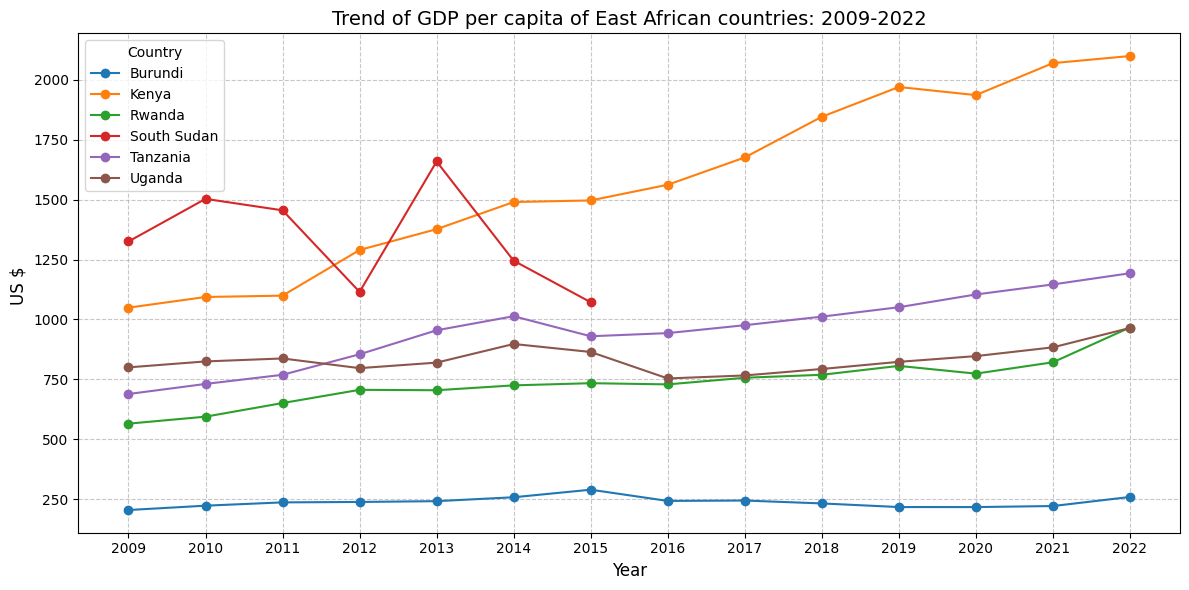

In [5]:
import matplotlib.pyplot as plt

# 1. Filter the gdp per capita DataFrame for East African countries
selected_countries = ['Burundi', 'Kenya', 'Rwanda', 'South Sudan','Tanzania','Uganda']
filtered_stats = gdp[gdp['Country Name'].isin(selected_countries)]

# 2. Prepare year columns and labels for 2009-2022
years_to_plot = [f'{year} [YR{year}]' for year in range(2009, 2023)]
x_axis_labels = [str(year) for year in range(2009, 2023)]

# 3. Create the figure in cell k0AmNyqm0zhi
plt.figure(figsize=(12, 6))

# 4. Loop through the filtered data and plot a line for each country
for _, row in filtered_stats.iterrows():
    plt.plot(x_axis_labels, row[years_to_plot], marker='o', label=row['Country Name'])

# 5. Customize the plot with title and axis labels
plt.title('Trend of GDP per capita of East African countries: 2009-2022', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('US $ ', fontsize=12)

# 6. Add legend, dashed grid, and use tight layout
plt.legend(title='Country', loc='best')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()